# Covid-19 Classifier

### Importing the libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('covid/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 148 images belonging to 2 classes.


Normal:


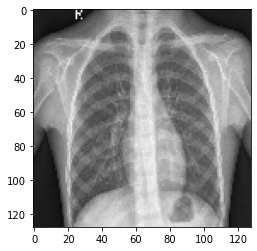

In [31]:
img1 = image.load_img('covid/train/NORMAL/IM-0001-0001.jpeg', target_size = (128, 128))
print("Normal:")
plt.figure()
plt.imshow(img1)
plt.show()


Pneumonia:


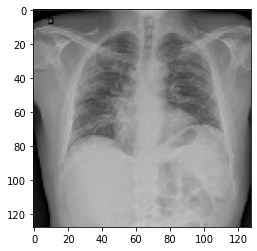

In [32]:
img2 = image.load_img('covid/train/PNEUMONIA/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', target_size = (128, 128))
print("Pneumonia:")
plt.figure()
plt.imshow(img2)
plt.show()

### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('covid/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding more convolutional layers

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 0.8191 - accuracy: 0.4459 - val_loss: 0.6802 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 0.6891 - accuracy: 0.5135 - val_loss: 0.6444 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 0.6759 - accuracy: 0.5338 - val_loss: 0.6354 - val_accuracy: 0.8250
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.6442 - accuracy: 0.5946 - val_loss: 0.5339 - val_accuracy: 0.9250
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.5177 - accuracy: 0.8514 - val_loss: 0.3017 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.3536 - accuracy: 0.8919 - val_loss: 0.2158 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.3031 - accuracy: 0.8784 - val_loss: 0.1482 - val_accuracy: 0.9500
Epoch 8/10
5/5 [=========================

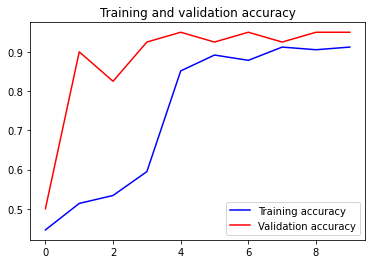

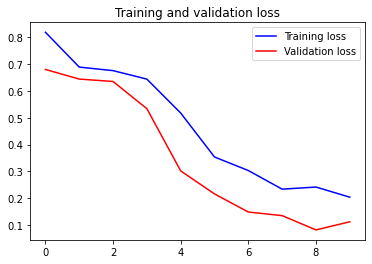

In [18]:
import matplotlib.pyplot as plt
accuracy = model.history['accuracy']
val_accuracy = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Part 4 - Making predictions

### Evaluating the Model on samples form the test set

label: 


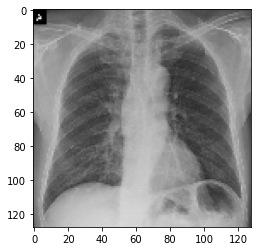

Prediction  Normal 


label: 


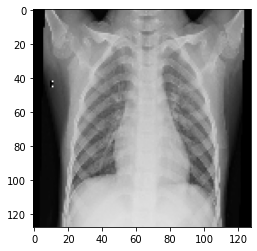

Prediction  Normal 


label: 


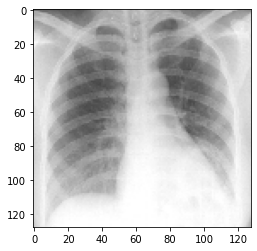

Prediction  PNEUMONIA 


label: 


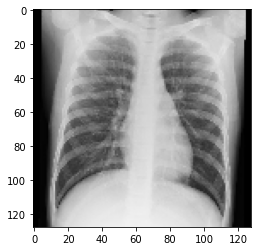

Prediction  Normal 


label: 


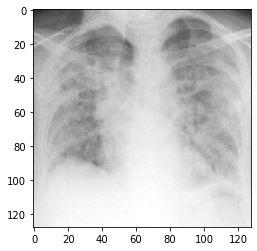

Prediction  PNEUMONIA 


label: 


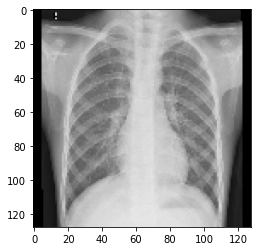

Prediction  Normal 




In [25]:
for i in range(1,7):
    print('label: ')
    test_image = image.load_img(f'covid/single_prediction/{i}.jpeg', target_size = (128, 128))
    plt.figure()
    plt.imshow(test_image)
    plt.show()
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0] == 1:
      prediction = 'PNEUMONIA'
    else:
      prediction = 'Normal'
    print('Prediction ',prediction,'\n\n')